Logistic Regression :
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    386751
           1       0.00      0.00      0.00      2252

    accuracy                           0.99    389003
   macro avg       0.50      0.50      0.50    389003
weighted avg       0.99      0.99      0.99    389003

Decision Tree :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.61      0.65      0.63      2252

    accuracy                           1.00    389003
   macro avg       0.80      0.82      0.81    389003
weighted avg       1.00      1.00      1.00    389003

Random Forest :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    386751
           1       0.83      0.68      0.75      2252

    accuracy                           1.00    389003
   macro avg       0.91      0.84      0.87    389003
weighted avg       1

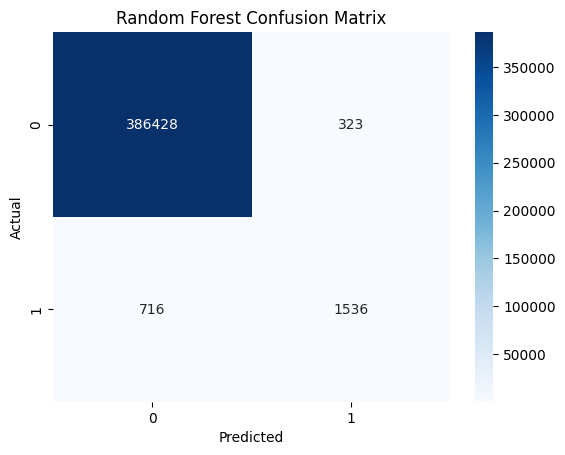

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("fraudTrain.csv")

# Step 2: Drop unnecessary or non-numeric columns
df = df.drop(['trans_date_trans_time', 'dob', 'merchant', 'first', 'last', 'gender',
'street', 'city', 'state', 'job', 'unix_time', 'cc_num', 'trans_num'], axis=1)

# Step 3: Encode categorical column 'category'
df['category'] = df['category'].astype('category').cat.codes

# Step 4: Drop rows with NaN in the target
df = df.dropna(subset=['is_fraud'])

# Step 5: Define features (X) and target (y)
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Step 6: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression :")
print(classification_report(y_test, y_pred_log))

# Step 9: Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree :")
print(classification_report(y_test, y_pred_tree))

# Step 10: Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest :")
print(classification_report(y_test, y_pred_rf))

# Step 11: Plot Confusion Matrix for Random Forest
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
